In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



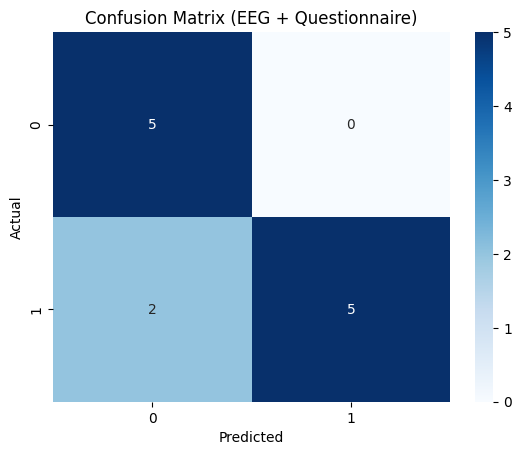


Enter EEG and questionnaire responses:
C3_1-3.9Hz_Power: 0.012463
Fz_15.6-31.2Hz_Power: 00.12549
Pz_31.2-62.2Hz_Power: 0.21317865
F7_7.8-15.6Hz_Power: 0.122493
T3_1-3.9Hz_Power: 0.213587
O1_15.6-31.2Hz_SampE: 2.013146
F7_31.2-62.2Hz_Power: 2.131459
A1: 1
A2: 0
A3: 


ValueError: could not convert string to float: ''

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CLG PROJECT/Datasets/MultiModal Data.csv")


drop_cols = ['sex', 'ethinicity', 'jaundice', 'autism', 'region',
             'used_app_before', 'age_desc', 'relation', 'ASD1', 'ASD2']
df = df.drop(columns=drop_cols)


eeg_cols = [col for col in df.columns if 'Power' in col or 'SampE' in col]
questionnaire_cols = [col for col in df.columns if col.startswith('A') or col.startswith('Q')]
feature_cols = eeg_cols + questionnaire_cols


df = df[feature_cols + ['Diagnosis']]
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.25, 0.2],
    'max_depth': [3, 4]
}
grid = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (EEG + Questionnaire)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


print("\nEnter EEG and questionnaire responses:")
user_input = []
for col in X.columns:
    val = float(input(f"{col}: "))
    user_input.append(val)

result = best_model.predict([user_input])[0]
prob = best_model.predict_proba([user_input])[0][1] * 100

if result == 1:
    print(f"\n🔍 Likely signs of Autism. Confidence: {prob:.2f}%")
else:
    print(f"\n✅ Unlikely signs of Autism. Confidence: {prob:.2f}%")
